In [1]:
!git clone https://github.com/SEHEEKA/cats-dogs

Cloning into 'cats-dogs'...
remote: Enumerating objects: 705, done.
remote: Total 705 (delta 0), reused 0 (delta 0), pack-reused 705
Receiving objects: 100% (705/705), 64.35 MiB | 17.73 MiB/s, done.


## Image Data Preprocessing: 
1. Convert each image to an array
2. Map each image labels
3. Augment the each image

### Image Preprocessing: Mapping each image with labels

### Image Preprocessing: Data Augmentation

A few Data Augemtation Techniques:

*   Image Rotation
*   Image Height & Width Shift
*   Image Horizontal & Vertical Flipping
*   Image Resizing
*   Image Zooming












#### Training Data

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img


# Random Data Augmentation(Rescale, Rotation, Flips, Zoom, Shifts) using ImageDataGenerator 
training_data_generator = ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')


# Image Directory
training_image_directory = "/content/cats-dogs/train"

# Generate Preprocessed Augmented Data
training_augmented_images = training_data_generator.flow_from_directory(
    training_image_directory,
    target_size=(180,180))

Found 557 images belonging to 2 classes.


#### Class Labels

In [3]:
training_augmented_images.class_indices

{'cats': 0, 'dogs': 1}

## Convolutional Neural Network Architecture
A CNN model have:

1. **Feature Learning layers**:

   1.1 Convolution + Activation(RELU) layers

   1.2 Pooling layers

2. **Classification layers**:

   2.1 Flatten layer

   2.2 Fully connected(Dense) layer 

   2.3 Fully connected(Dense) layer with Softmax






**Feature Extraction Visualisation(Convolution + Relu)**

The convolution is a mathematical computation between two arrays, the image array and the filter array which gives a new image array.




## Mathematically:

**Conv2D Layer**

The convolution is a mathematical computation between two 2D arrays, the image array and the filter array which gives a new image array.

A portion of the input image array matrix, called a sub-array(size same as the size of the filter) is taken, starting from the top left.

This sub-array is multiplied with the filter array. We can multiply one array matrix to another, by multiplying 1st element to 1st element of both the arrays(2nd element to 2nd element of both arrays and so on).

After multiplying the result is added, which gives the value of the 1st element of the new image array.

Then we shift towards right by one column, repeat the above steps to get the value of the 2nd element of the new array.

Once the whole row is finished we shift downwards by one row, repeat the above steps to get the value of all elements of the new array one by one.

The whole process is repeated with different filters, to get different output, which all together is the output of the 1st Conv2D layer.

These outputs from the 1st Conv2D layer are given to the 2nd Conv2D layer and convolutions are performed.

This repeated for all the layers of the CNN model.




**ReLU**

ReLU is defined as a function, y= f(x) such that it gives x for all values of x > 0 and 0 for all values of x<0.



**MaxPooling2D**

First there is an input array(for example 4x4) and pool size(for example 2x2). Pool size is always smaller than the input array size.

Then the maximum value is taken from the sub-array of size equal to pool size.

The result after applying the Max Pooling will be the new array of size equal to the half of the size of the original input array.

Since our input array is 4x4, after max pooling the new array will be 2x2, hence reducing the dimension of the array.




## Define/Build Convolution Neural Network

In [4]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    
    # 1st Convolution & Pooling layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(180, 180, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # 2nd Convolution & Pooling layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # 3rd Convolution & Pooling layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # 4th Convolution & Pooling layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten the results to feed into a Dense Layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    # Classification Layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

## Model Summary

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 128)      0

## Compile Model

Before training the model we need to compile it. We compile the model using the **compile()** method(Keras). 

The compile method takes many arguments, but we will pass the three arguments which must be specified. The arguments are: 

1. Optimizers

2. Loss function 

3. Metrics for prediction



**Need of Model Compilation:**

When the model is trained it can, almost never, be 100% efficient, that it cannot always predict the class of the image correctly.

This leads to the concept of loss during model training, which tells us how bad the model is performing.

Hence we need to use the loss functions(these are mathematical computation functions) to get the value of the loss. 

For example, the result of the loss function gives the value as 0.45, this means that 45 %(0.45X100) of the times, the model will predict wrong results, and only 55% times will predict the correct results!

That means, we should try to minimize the loss function value, because a lower loss value means our model is going to perform better. The process of minimizing (or maximizing) the value of a mathematical function/expression is called optimization.



In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Fit & Save Model

In [9]:
history = model.fit(training_augmented_images, epochs=20, verbose=True)

model.save("model.h5")

Epoch 1/20
18/18 [==============================] - 94s 5s/step - loss: 0.7007 - accuracy: 0.4811
Epoch 2/20
18/18 [==============================] - 78s 4s/step - loss: 0.6937 - accuracy: 0.5081
Epoch 3/20
18/18 [==============================] - 77s 4s/step - loss: 0.6939 - accuracy: 0.5117
Epoch 4/20
18/18 [==============================] - 84s 5s/step - loss: 0.6933 - accuracy: 0.4865
Epoch 5/20
18/18 [==============================] - 77s 4s/step - loss: 0.6940 - accuracy: 0.5260
Epoch 6/20
18/18 [==============================] - 77s 4s/step - loss: 0.6942 - accuracy: 0.4901
Epoch 7/20
18/18 [==============================] - 78s 4s/step - loss: 0.6937 - accuracy: 0.4811
Epoch 8/20
18/18 [==============================] - 77s 4s/step - loss: 0.6932 - accuracy: 0.5027
Epoch 9/20
18/18 [==============================] - 76s 4s/step - loss: 0.6931 - accuracy: 0.5063
Epoch 10/20
18/18 [==============================] - 78s 4s/step - loss: 0.6929 - accuracy: 0.5242
Epoch 11/20
18/18 [

## Running/Testing the Model
 #### Predict the Class of an Unseen Image

In [10]:
training_augmented_images.class_indices

{'cats': 0, 'dogs': 1}

1/1 [==============================] - 0s 51ms/step


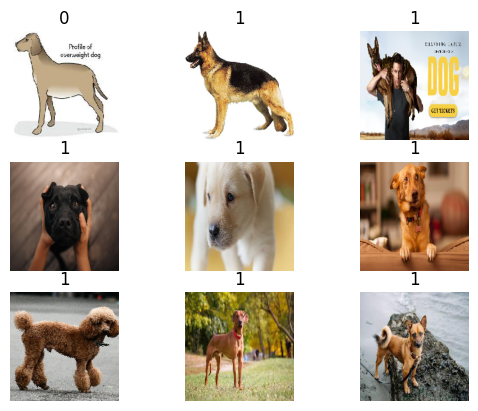

In [13]:
import os
import numpy as np

from matplotlib import pyplot
from matplotlib.image import imread

import tensorflow
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.preprocessing.image import img_to_array

# Testing image directory
testing_image_directory = '/content/cats-dogs/test/dogs'

# All image files in the directory
img_files = os.listdir(testing_image_directory)

i= 0

# Loop through an 9 image files
for file in img_files[51:60]:

  # full path of the image
  img_files_path = os.path.join(testing_image_directory, file)

  # load image 
  img_1 = load_img(img_files_path,target_size=(180, 180))

  # convert image to an array
  img_2 = img_to_array(img_1)

  # increase the dimension
  img_3 = np.expand_dims(img_2, axis=0)
  
  # predict the class of an unseen image
  prediction = model.predict(img_3)
  # print(prediction)

  predict_class = np.argmax(prediction, axis=1)
  # print(predict_class)

  # plot the image using subplot
  pyplot.subplot(3, 3, i+1)
  pyplot.imshow(img_2.astype('uint8'))
  
  # Add title of the plot as predicted class value
  pyplot.title(predict_class[0])

  # Do not show x and y axis with the image
  pyplot.axis('off')

  i=i+1

pyplot.show()

## Accuracy Curve

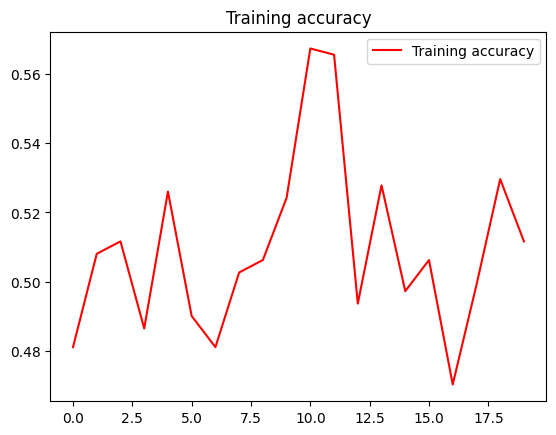

In [14]:
from matplotlib import pyplot

acc = history.history['accuracy']

# print(acc)

epochs = range(len(acc))

pyplot.plot(epochs, acc, 'r', label='Training accuracy')

pyplot.title('Training accuracy')

pyplot.legend()

pyplot.show()